### Importing Libraries and Loading the Dataset

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [45]:
df= pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [46]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [47]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [48]:
df.shape

(200, 4)

In [49]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [50]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [51]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

### Visualization

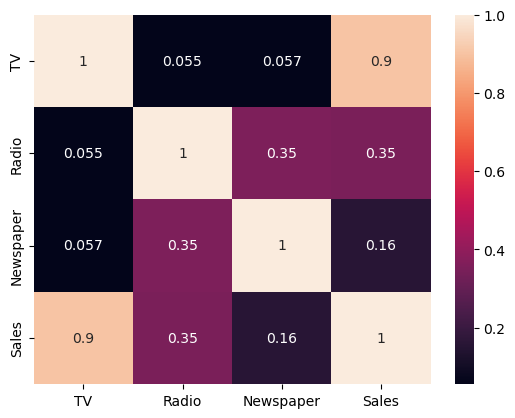

In [52]:
sns.heatmap(df.corr(), annot = True)
plt.show()

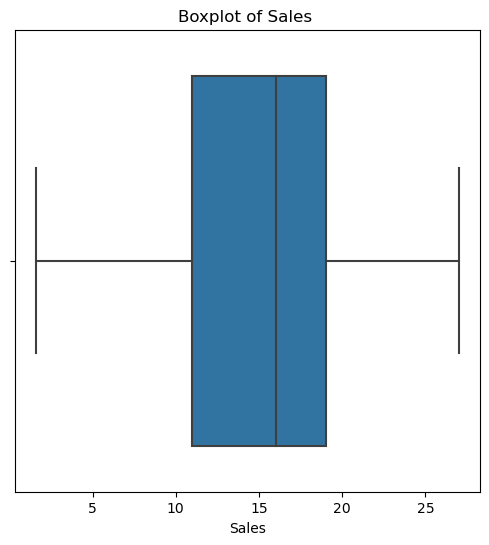

In [53]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales ')
plt.xlabel('Sales')
plt.show()

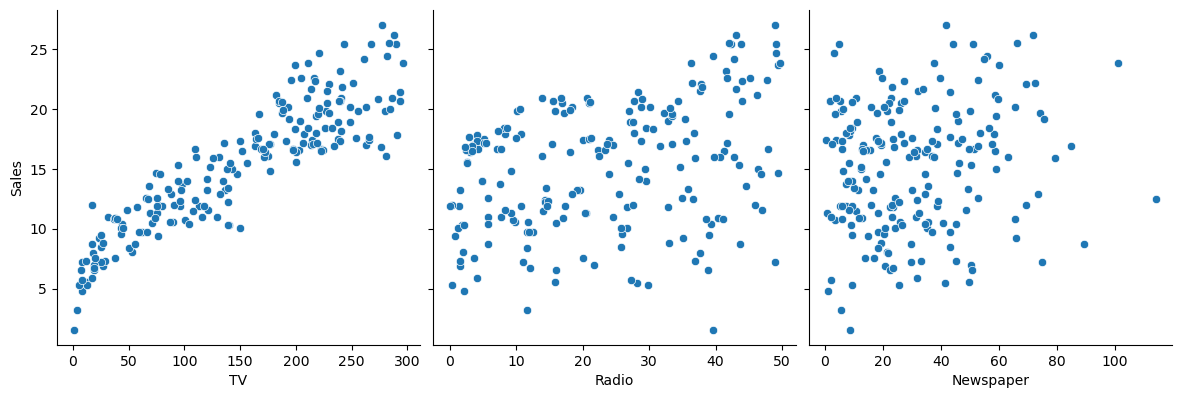

In [54]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

### Splitting the Dataset

In [55]:
x = df[['TV']]
y = df['Sales']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

### Linear Regression

In [57]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [58]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  6.948683200001357
Coefficient: [0.05454575]


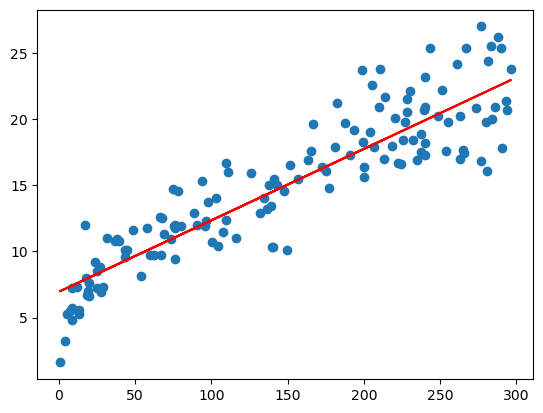

In [59]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [60]:
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)  

In [61]:
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392
167,17.2,18.228745
116,12.2,14.541452
96,16.7,17.726924
52,22.6,18.752384
69,22.3,18.774202


In [62]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.6480589869746527
Mean Square Error: 4.077556371826949
Root Mean Square Error: 2.019296008966231


### Multiple Regression

In [33]:
#instance of linear regression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [36]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)


Intercept:  6.948683200001357
Coefficients: [0.05454575]


In [37]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


In [39]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
slr_diff.head()

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392


In [40]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


Mean Absolute Error: 1.6480589869746527
Mean Square Error: 4.077556371826949
Root Mean Square Error: 2.019296008966231
